### Resnet

In [7]:
import tensorflow as tf
from selenium import webdriver
from bs4 import BeautifulSoup as bs
import pandas as pd
import time
from selenium.webdriver.common.keys import Keys
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, GlobalAveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model

import os
from urllib.request import urlopen
from urllib.parse import quote_plus

In [7]:
base_dir = "./Data"

train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

train_p1_dir = os.path.join(train_dir, "금전수")
train_p2_dir = os.path.join(train_dir, "퓨미라")
train_p3_dir = os.path.join(train_dir, "식물 타라")
train_p4_dir = os.path.join(train_dir, "천냥금")
train_p5_dir = os.path.join(train_dir, "파키라")


test_p1_dir = os.path.join(test_dir, "금전수t")
test_p2_dir = os.path.join(test_dir, "퓨미라t")
test_p3_dir = os.path.join(test_dir, "식물 타라t")
test_p4_dir = os.path.join(test_dir, "천냥금t")
test_p5_dir = os.path.join(test_dir, "파키라t")

In [8]:
print("훈련용 금전수 데이터 개수 : ", len(os.listdir(train_p1_dir)))
print("훈련용 퓨미라 데이터 개수 : ", len(os.listdir(train_p2_dir)))
print("훈련용 식물 타라 데이터 개수 : ", len(os.listdir(train_p3_dir)))
print("훈련용 천냥금 데이터 개수 : ", len(os.listdir(train_p4_dir)))
print("훈련용 파키라 데이터 개수 : ", len(os.listdir(train_p5_dir)))

print("테스트용 금전수 데이터 개수 : ", len(os.listdir(test_p1_dir)))
print("테스트용 퓨미라 데이터 개수 : ", len(os.listdir(test_p2_dir)))
print("테스트용 식물 타라 데이터 개수 : ", len(os.listdir(test_p3_dir)))
print("테스트용 천냥금 데이터 개수 : ", len(os.listdir(test_p4_dir)))
print("테스트용 파키라 데이터 개수 : ", len(os.listdir(test_p5_dir)))

훈련용 금전수 데이터 개수 :  180
훈련용 퓨미라 데이터 개수 :  180
훈련용 식물 타라 데이터 개수 :  180
훈련용 천냥금 데이터 개수 :  180
훈련용 파키라 데이터 개수 :  180
테스트용 금전수 데이터 개수 :  20
테스트용 퓨미라 데이터 개수 :  20
테스트용 식물 타라 데이터 개수 :  20
테스트용 천냥금 데이터 개수 :  20
테스트용 파키라 데이터 개수 :  20


In [159]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 위노그라드 알고리즘 설정
os.environ['TF_ENABLE_WINOGRAD_NONFUSED'] = '1'

rootPath = './Data'

imageGenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
    validation_split=.1
)

trainGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'train'),
    target_size=(64, 64),
    subset='training'
)

validationGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'train'),
    target_size=(64, 64),
    subset='validation'
)

Found 810 images belonging to 5 classes.
Found 90 images belonging to 5 classes.


In [160]:
resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(64, 64, 3))
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [11]:
for i, layer in enumerate(resnet.layers):
    print(i, layer.name)

0 input_1
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [13]:
print("number of layers:", len(resnet.layers)) #175

number of layers: 175


# Adding custom Layers

In [16]:
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(512, activation="relu")(x)
predictions = Dense(5, activation="softmax")(x)
model1 = Model(inputs=resnet.input, outputs=predictions)

# fine tuning

In [17]:
for layer in resnet.layers[:143]:
        layer.trainable = False

# compile the model

In [ ]:
model1.compile(optimizer='adam', 
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

In [161]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [19]:
epochs = 32
history = model1.fit_generator(
    trainGen, 
    epochs=epochs,
    steps_per_epoch=trainGen.samples / epochs, 
    validation_data=validationGen,
    validation_steps=trainGen.samples / epochs,
    verbose=1
)

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/32
25/25 [==============================] - 19s 651ms/step - loss: 1.9212 - accuracy: 0.1841 - val_loss: 13.4570 - val_accuracy: 0.2000
Epoch 2/32
25/25 [==============================] - 15s 594ms/step - loss: 1.6736 - accuracy: 0.2198
Epoch 3/32
25/25 [==============================] - 15s 597ms/step - loss: 1.6383 - accuracy: 0.1816
Epoch 4/32
25/25 [==============================] - 15s 613ms/step - loss: 1.5458 - accuracy: 0.3049
Epoch 5/32
25/25 [==============================] - 15s 595ms/step - loss: 1.5420 - accuracy: 0.3021
Epoch 6/32
25/25 [==============================] - 15s 606ms/step - loss: 1.5159 - accuracy: 0.3047
Epoch 7/32
25/25 [==============================] - 15s 608ms/step - loss: 1.4895 - accuracy: 0.2989
Epoch 8/32
25/25 [==============================] - 15s 619ms/step - loss: 1.5147 - accuracy: 0.2988
Epoch 9/32
25/25 [==============================] - 15s 598ms/step - loss: 1.4808 - accuracy: 0.3128
Epoch 10/32
25/25 [=============================

In [12]:
import matplotlib.pyplot as plt

def show_graph(history_dict):
    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(16, 1))
    
    plt.subplot(121)
    plt.subplots_adjust(top=2)
    plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
#    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Trainging and validation accuracy and loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy and Loss')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, -0.1))

    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
#    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, 0))

    plt.show()

In [30]:
def smooth_curve(points, factor=.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

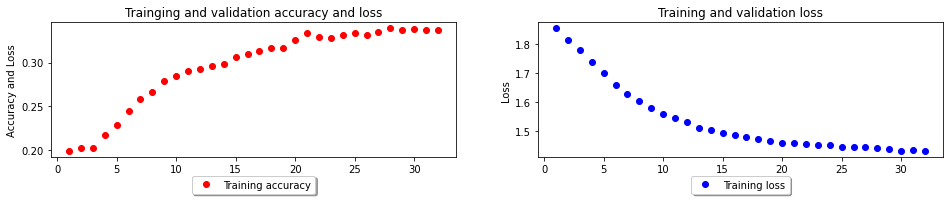

In [31]:
smooth_data = {}
for key, val in history.history.items():
    smooth_data[key] = smooth_curve(val)
show_graph(smooth_data)

In [119]:
testGenerator = ImageDataGenerator(
    rescale=1./255
)

testGen = testGenerator.flow_from_directory(
    os.path.join(rootPath, 'test'),
    target_size=(64, 64),
)

model1.evaluate_generator(testGen)

Found 100 images belonging to 5 classes.


[6.498600006103516, 0.23000000417232513]

In [105]:
trainGen.samples

810

In [36]:
epochs = 32
history = model1.fit_generator(
    trainGen, 
    epochs=epochs,
    steps_per_epoch=trainGen.samples / epochs, 
    validation_data=validationGen,
    validation_steps=trainGen.samples / epochs,
    verbose=1
)

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/32
25/25 [==============================] - 16s 626ms/step - loss: 1.4153 - accuracy: 0.3506 - val_loss: 13.1491 - val_accuracy: 0.2000
Epoch 2/32
25/25 [==============================] - 17s 655ms/step - loss: 1.4363 - accuracy: 0.3568
Epoch 3/32
25/25 [==============================] - 16s 645ms/step - loss: 1.4263 - accuracy: 0.3630
Epoch 4/32
25/25 [==============================] - 17s 661ms/step - loss: 1.4501 - accuracy: 0.3617
Epoch 5/32
25/25 [==============================] - 17s 673ms/step - loss: 1.4692 - accuracy: 0.3358
Epoch 6/32
25/25 [==============================] - 17s 647ms/step - loss: 1.4093 - accuracy: 0.3642
Epoch 7/32
25/25 [==============================] - 17s 684ms/step - loss: 1.4276 - accuracy: 0.3679
Epoch 8/32
25/25 [==============================] - 17s 663ms/step - loss: 1.3698 - accuracy: 0.3938
Epoch 9/32
25/25 [==============================] - 16s 619ms/step - loss: 1.4044 - accuracy: 0.3642
Epoch 10/32
25/25 [=============================

In [135]:
testGenerator = ImageDataGenerator(
    rescale=1./255
)

testGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'test'),
    target_size=(150, 150),
)

model1.evaluate_generator(testGen)

Found 100 images belonging to 5 classes.


[1.6191248893737793, 0.20000000298023224]

In [205]:
from tensorflow.keras.preprocessing import image

In [206]:
import numpy as np

ValueError: cannot reshape array of size 67500 into shape (1,64,64,3)

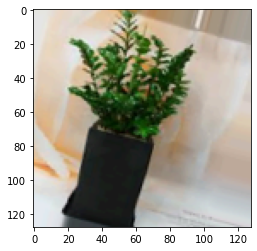

In [207]:
cls_index = ['금전수','퓨미라','식물 타라','천냥금','파키라']

imgs = testGen.next()
arr = imgs[0][0]
img = tf.keras.preprocessing.image.array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model1.predict(arr.reshape(1, 64, 64, 3))
print(result)
print('예측: {}'.format(cls_index[np.argmax(result)]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])]))

### InceptionV6

- 데이터 셋 그대로 이용

In [2]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications import InceptionV3

In [22]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 위노그라드 알고리즘 설정
os.environ['TF_ENABLE_WINOGRAD_NONFUSED'] = '1'

rootPath = './Data'

# 이미지의 사이즈는 논문에서는 (224, 224, 3)을 사용하여, 빠른 학습을 위해 사이즈를 조정
IMG_SIZE = (150, 150, 3)  

imageGenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
    validation_split=.1
)

trainGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'train'),
    target_size=IMG_SIZE[:2],
    subset='training'
)

validationGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'train'),
    target_size=IMG_SIZE[:2],
    subset='validation'
)

Found 810 images belonging to 5 classes.
Found 90 images belonging to 5 classes.


In [23]:
rootPath = './Data'

testGenerator = ImageDataGenerator(
    rescale=1./255
)

testGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'test'),
    target_size=IMG_SIZE[:2],
)

Found 100 images belonging to 5 classes.


In [5]:
inceptionv3 = InceptionV3(include_top=False, weights='imagenet', input_shape=IMG_SIZE) 
# 이 모델은 크기 적어도 75X75이상 이어야 한다

In [8]:
y = inceptionv3.output
y = GlobalAveragePooling2D()(y)
y = Dense(1024, activation="relu")(y)
y = Dropout(0.5)(y)
y = Dense(512, activation="relu")(y)
predictions2 = Dense(5, activation="softmax")(y)
model2 = Model(inputs=inceptionv3.input, outputs=predictions2)

In [9]:
model2.compile(optimizer='adam', 
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

In [10]:
epochs = 32

history = model2.fit_generator(
    trainGen, 
    epochs=epochs,
    steps_per_epoch=trainGen.samples / epochs, 
    validation_data=validationGen,
    validation_steps=trainGen.samples / epochs,
    verbose=1
)

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/32
25/25 [==============================] - 54s 2s/step - loss: 1.7786 - accuracy: 0.3934 - val_loss: 15.1275 - val_accuracy: 0.2444
Epoch 2/32
25/25 [==============================] - 47s 2s/step - loss: 1.2071 - accuracy: 0.5571
Epoch 3/32
25/25 [==============================] - 48s 2s/step - loss: 1.0493 - accuracy: 0.6087
Epoch 4/32
25/25 [==============================] - 47s 2s/step - loss: 0.8841 - accuracy: 0.6623
Epoch 5/32
25/25 [==============================] - 48s 2s/step - loss: 0.7254 - accuracy: 0.7314
Epoch 6/32
25/25 [==============================] - 51s 2s/step - loss: 0.7573 - accuracy: 0.7422
Epoch 7/32
25/25 [==============================] - 50s 2s/step - loss: 0.7149 - accuracy: 0.7489
Epoch 8/32
25/25 [==============================] - 50s 2s/step - loss: 0.7531 - accuracy: 0.7485
Epoch 9/32
25/25 [==============================] - 51s 2s/step - loss: 0.5653 - accuracy: 0.8008
Epoch 10/32
25/25 [==============================] - 52s 2s/step - loss: 0.

In [163]:
model2.evaluate_generator(testGen)
### 테스트젠 정확도 68퍼센트까진 도달 

[0.9315640926361084, 0.6800000071525574]

In [127]:
model2.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_470 (Conv2D)             (None, 74, 74, 32)   864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_470 (BatchN (None, 74, 74, 32)   96          conv2d_470[0][0]                 
__________________________________________________________________________________________________
activation_470 (Activation)     (None, 74, 74, 32)   0           batch_normalization_470[0][0]    
____________________________________________________________________________________________

ValueError: cannot reshape array of size 67500 into shape (1,64,64,3)

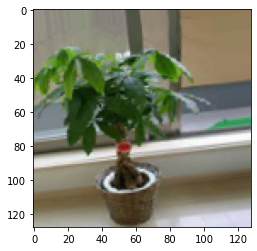

In [16]:
cls_index = ['금전수','퓨미라','식물 타라','천냥금','파키라']

imgs = testGen.next()
arr = imgs[0][0]
img = tf.keras.preprocessing.image.array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model2.predict(arr.reshape(1, 64, 64, 3))
print(result)
print('예측: {}'.format(cls_index[np.argmax(result)]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])]))

- 추가 에폭시 학습 -> 미세조정 후 학습 진행해보려 함

In [27]:
model2.evaluate_generator(testGen)
### 테스트젠 정확도 68퍼센트까진 도달 

[7.06937313079834, 0.44999998807907104]

In [29]:
for layer in inceptionv3.layers[:299]:
        layer.trainable = False

In [28]:
for i, layer in enumerate(inceptionv3.layers):
    print(i, layer.name)

0 input_1
1 conv2d
2 batch_normalization
3 activation
4 conv2d_1
5 batch_normalization_1
6 activation_1
7 conv2d_2
8 batch_normalization_2
9 activation_2
10 max_pooling2d
11 conv2d_3
12 batch_normalization_3
13 activation_3
14 conv2d_4
15 batch_normalization_4
16 activation_4
17 max_pooling2d_1
18 conv2d_8
19 batch_normalization_8
20 activation_8
21 conv2d_6
22 conv2d_9
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_5
29 conv2d_7
30 conv2d_10
31 conv2d_11
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed0
41 conv2d_15
42 batch_normalization_15
43 activation_15
44 conv2d_13
45 conv2d_16
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 average_pooling2d_1
51 conv2d_12
52 conv2d_14
53 conv2d_17
54 conv2d_18
55 batch_normalization_12
56 batch_normalization_14
5

In [30]:
model2.compile(optimizer='adam', 
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

In [31]:
epochs = 32

history = model2.fit_generator(
    trainGen, 
    epochs=epochs,
    steps_per_epoch=trainGen.samples / epochs, 
    validation_data=validationGen,
    validation_steps=trainGen.samples / epochs,
    verbose=1
)

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/32
25/25 [==============================] - 15s 462ms/step - loss: 3.0610 - accuracy: 0.5088 - val_loss: 1.7202 - val_accuracy: 0.5667
Epoch 2/32
25/25 [==============================] - 10s 393ms/step - loss: 1.6808 - accuracy: 0.6115
Epoch 3/32
25/25 [==============================] - 11s 416ms/step - loss: 1.1715 - accuracy: 0.6236
Epoch 4/32
25/25 [==============================] - 11s 408ms/step - loss: 1.0633 - accuracy: 0.6562
Epoch 5/32
25/25 [==============================] - 10s 404ms/step - loss: 0.9969 - accuracy: 0.6428
Epoch 6/32
25/25 [==============================] - 11s 411ms/step - loss: 1.0423 - accuracy: 0.6409
Epoch 7/32
25/25 [==============================] - 11s 436ms/step - loss: 0.8945 - accuracy: 0.6814
Epoch 8/32
25/25 [==============================] - 11s 424ms/step - loss: 0.9514 - accuracy: 0.6526
Epoch 9/32
25/25 [==============================] - 11s 433ms/step - loss: 0.8591 - accuracy: 0.6823
Epoch 10/32
25/25 [==============================

In [35]:
model2.evaluate_generator(testGen)
### 테스트젠 정확도 68퍼센트까진 도달 

[1.031266212463379, 0.6200000047683716]

- 추가 에폭시 학습 시작

In [36]:
epochs = 32

history = model2.fit_generator(
    trainGen, 
    epochs=epochs,
    steps_per_epoch=trainGen.samples / epochs, 
    validation_data=validationGen,
    validation_steps=trainGen.samples / epochs,
    verbose=1
)

Epoch 1/32
25/25 [==============================] - 11s 437ms/step - loss: 0.7310 - accuracy: 0.7309 - val_loss: 0.9801 - val_accuracy: 0.6778
Epoch 2/32
25/25 [==============================] - 11s 423ms/step - loss: 0.6913 - accuracy: 0.7481
Epoch 3/32
25/25 [==============================] - 10s 398ms/step - loss: 0.7454 - accuracy: 0.7247
Epoch 4/32
25/25 [==============================] - 10s 399ms/step - loss: 0.7676 - accuracy: 0.7210
Epoch 5/32
25/25 [==============================] - 10s 400ms/step - loss: 0.7660 - accuracy: 0.7222
Epoch 6/32
25/25 [==============================] - 10s 397ms/step - loss: 0.7630 - accuracy: 0.7222
Epoch 7/32
25/25 [==============================] - 10s 399ms/step - loss: 0.8228 - accuracy: 0.6951
Epoch 8/32
25/25 [==============================] - 11s 417ms/step - loss: 0.7462 - accuracy: 0.7272
Epoch 9/32
25/25 [==============================] - 13s 487ms/step - loss: 0.7462 - accuracy: 0.7198
Epoch 10/32
25/25 [==============================

In [37]:
model2.evaluate_generator(testGen)
### 테스트젠 정확도 68퍼센트까진 도달 

[1.0009928941726685, 0.5799999833106995]

### VGG16